<a href="https://colab.research.google.com/github/asepmuhidin/DM_22C4/blob/main/titanic_knn_classification_tuning_paramater_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Classification - KNN Model (Baseline)
### Created by Asep Muhidin, S.Kom., M.Kom.
### Mata Kuliah Data Mining Mei 2025

## Dataset Loading

In [ ]:
import pandas as pd
ffile="https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/refs/heads/main/dataset/titanic.csv"

dataset=pd.read_csv(ffile)
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Preprocessing

In [ ]:
#handle null value and Impute

dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Drop Cabin Column
dataset.drop('Cabin',axis=1,inplace=True)

In [ ]:
#Most Frequnet Cabin
dataset['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [ ]:
#Impute Age Column with average and Embarked with 'S'
dataset.fillna({
    'Age':dataset['Age'].mean(),
    'Embarked':'S'
},inplace=True)

In [ ]:
#Check dataset
dataset.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#Label Encoding (Sex, Embarked)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dataset['Sex']=le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])


In [ ]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


## Feature and  Label(Class) Splitting

In [ ]:
X=dataset[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
y=dataset['Survived']

## Train- Test Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42, shuffle=True, stratify=y)

## KNN Modeling (Training)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

## Evaluation Model

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'Precision : {precision_score(y_test,y_pred)}')
print(f'Recall : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

[[86 24]
 [31 38]]
Accuracy : 0.6927374301675978
Precision : 0.6129032258064516
Recall : 0.5507246376811594
F1 Score : 0.5801526717557252
              precision    recall  f1-score   support

           0       0.74      0.78      0.76       110
           1       0.61      0.55      0.58        69

    accuracy                           0.69       179
   macro avg       0.67      0.67      0.67       179
weighted avg       0.69      0.69      0.69       179



In [ ]:
y_pred=knn.predict(X_train)
print(confusion_matrix(y_train,y_pred))
print(f'Accuracy : {accuracy_score(y_train,y_pred)}')
print(f'Precision : {precision_score(y_train,y_pred)}')
print(f'Recall : {recall_score(y_train,y_pred)}')
print(f'F1 Score : {f1_score(y_train,y_pred)}')
print(classification_report(y_train,y_pred))

[[394  45]
 [ 93 180]]
Accuracy : 0.8061797752808989
Precision : 0.8
Recall : 0.6593406593406593
F1 Score : 0.7228915662650602
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       439
           1       0.80      0.66      0.72       273

    accuracy                           0.81       712
   macro avg       0.80      0.78      0.79       712
weighted avg       0.81      0.81      0.80       712



## Bagaimana cara mengimprove Model --- SEE U NEXT WEEK

In [ ]:
#Cross Validation Scores
from sklearn.model_selection import cross_val_score

scores=cross_val_score(knn,X,y,cv=3, scoring='accuracy')
print(scores)
print(f'Accuracy : {scores.mean()}')

[0.69023569 0.71717172 0.7003367 ]
Accuracy : 0.7025813692480359


In [ ]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


## Standarisasi Nilai fitur

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scl=sc.fit_transform(X)

In [ ]:
X_scl=pd.DataFrame(X_scl,columns=X.columns)
X_scl.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.827377,0.737695,-0.592481,0.432793,-0.473674,-0.502445,0.585954
1,-1.566107,-1.355574,0.638789,0.432793,-0.473674,0.786845,-1.942303
2,0.827377,-1.355574,-0.284663,-0.474545,-0.473674,-0.488854,0.585954
3,-1.566107,-1.355574,0.407926,0.432793,-0.473674,0.420730,0.585954
4,0.827377,0.737695,0.407926,-0.474545,-0.473674,-0.486337,0.585954


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_scl,y,test_size=0.2,random_state=42, shuffle=True, stratify=y)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(f'Accuracy : {accuracy_score(y_test,y_pred)}')
print(f'Precision : {precision_score(y_test,y_pred)}')
print(f'Recall : {recall_score(y_test,y_pred)}')
print(f'F1 Score : {f1_score(y_test,y_pred)}')
print(classification_report(y_test,y_pred))

[[97 13]
 [19 50]]
Accuracy : 0.8212290502793296
Precision : 0.7936507936507936
Recall : 0.7246376811594203
F1 Score : 0.7575757575757576
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       110
           1       0.79      0.72      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.82       179



In [ ]:
n=range(1,53,2)
for k in n:
  print(k, end=' ')

1 3 5 7 9 11 13 15 17 19 21 23 25 27 29 31 33 35 37 39 41 43 45 47 49 51 

In [ ]:
train, test=[],[]
for k in n:
  knn=KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')
  knn.fit(X_train,y_train)
  train.append(knn.score(X_train,y_train))
  test.append(knn.score(X_test,y_test))

In [ ]:
tbl_scores=pd.DataFrame({'K':n,'Train':train,'Test':test})
tbl_scores

,K,Train,Test
0,1,0.976124,0.737430
1,3,0.875000,0.815642
2,5,0.851124,0.821229
3,7,0.848315,0.810056
4,9,0.848315,0.798883
5,11,0.835674,0.793296
6,13,0.834270,0.798883
7,15,0.830056,0.815642
8,17,0.834270,0.810056
9,19,0.831461,0.810056


In [ ]:
import matplotlib.pyplot as plt

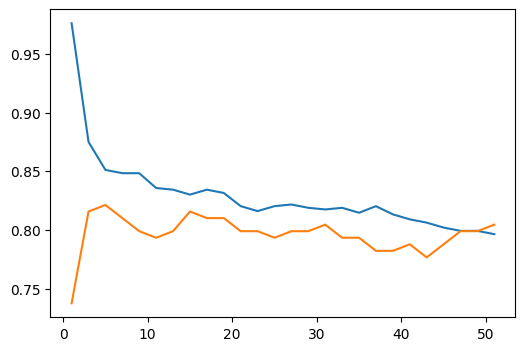

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(tbl_scores['K'],tbl_scores['Train'],label='Train')
plt.plot(tbl_scores['K'],tbl_scores['Test'],label='Test')

In [ ]:
#Nilai akurasi tertinggi di Test ada pada nilai K
tbl_scores[tbl_scores['Test']==tbl_scores.Test.max()]

,K,Train,Test
2,5,0.851124,0.821229
